In [1]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import random
%matplotlib inline

- SECTION 1

Null Hypothesis: There is a strong relationship between the number of wins at home and the number of total wins.

In [2]:
df = pd.read_csv('basketball_teams.csv')

- SECTION2 

The relationship between the number of wins at home and the total wins(which includes the wins away and wins at home) will be analysed. 
homeWon variable respresents the number of wins at home and
won variable represents the total number of wins.

In [3]:
# some of the data for homeWon was missing, even though 0 is a possible value for homeWon,
# I dropped the values which have also homeLost values as 0 at the same time. Basically this
# is how I differentiate the actual 0's from the other 0's which indicates a missing data.
df = df.drop(df[(df.homeWon == 0) & (df.homeLost == 0)].index) 

homeWon = df['homeWon'].dropna()
totalWon = df['won'].dropna()


In [4]:
df[['homeWon', 'won']]

homeWon  won
0          14   22
1          22   39
2          17   30
3          12   20
4          18   33
5          23   35
6          11   15
7          19   28
8          22   38
9          15   22
10         29   49
11         17   28
12         11   20
13         14   28
14         12   26
15         14   27
16          3    6
17         17   29
18         19   28
19         17   29
20         17   25
21         16   38
22         15   22
23         14   18
24         26   44
25         18   32
26         19   28
27          7   12
28         24   45
29         17   29
...       ...  ...
1506        7   13
1507       10   18
1508        8   14
1509       10   14
1510       12   17
1511        7    9
1512        6    9
1513       12   15
1514       11   15
1515       11   24
1516        7   14
1517        9   14
1518        4    4
1519        9   13
1520       10   17
1521        9   13
1522        7   11
1523        8   14
1524        8   13
1525        2    3
1526        3    3
1527        1    1
1528        2    2
1529        9   13
1530        4    4
1531        1    3
1532        9   12
1533        5    8
1534        2    3
1535        7   12

[1431 rows x 2 columns]

- SECTION 3

describe() function provides some basic statistics for the variables.
Histogram, PMF and CDF are shown below.

In [5]:
homeWon.describe()

count    1431.000000
mean       22.928721
std         8.252600
min         0.000000
25%        18.000000
50%        24.000000
75%        29.000000
max        40.000000
Name: homeWon, dtype: float64

In [6]:
totalWon.describe()

count    1431.000000
mean       37.631726
std        14.183634
min         0.000000
25%        28.000000
50%        39.000000
75%        48.000000
max        72.000000
Name: won, dtype: float64

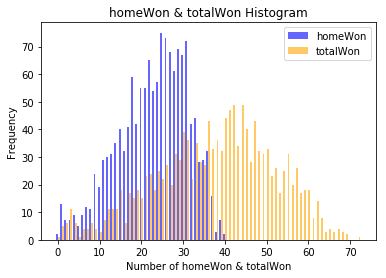

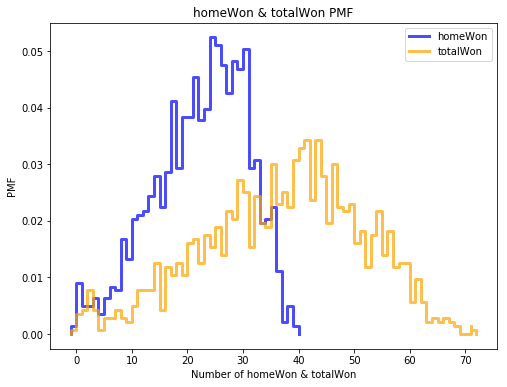

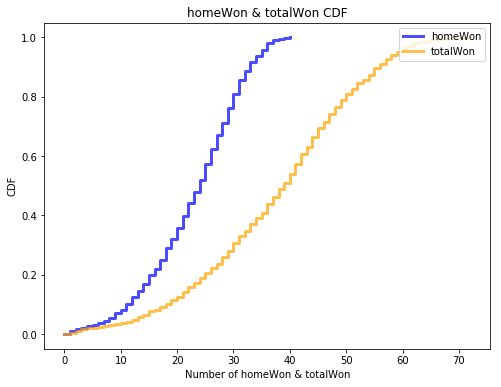

<Figure size 576x432 with 0 Axes>

In [7]:
# the histogram for the relationship between homeWon & totalWon
homeWon_hist = thinkstats2.Hist(homeWon,label="homeWon")
totalWon_hist = thinkstats2.Hist(totalWon,label="totalWon")
thinkplot.Hist(homeWon_hist, color='Blue', width=0.45, align='right')
thinkplot.Hist(totalWon_hist, color='Orange', width=0.45, align='left') 
thinkplot.Show(xlabel='Number of homeWon & totalWon', ylabel='Frequency' ,loc='upper right', title='homeWon & totalWon Histogram')

# the PMF for the histogram of the relationship between homeWon & totalWon
homeWon_hist1 = thinkstats2.Pmf(homeWon,label="homeWon")
totalWon_hist1 = thinkstats2.Pmf(totalWon,label="totalWon")
thinkplot.PrePlot(2)
thinkplot.Pmf(homeWon_hist1, color='Blue', align='right')
thinkplot.Pmf(totalWon_hist1, color='Orange', align='right') 
thinkplot.Show(xlabel='Number of homeWon & totalWon', ylabel='PMF',loc='upper right',title='homeWon & totalWon PMF')

# the CDF of the histogram of the relationship between homeWon & totalWon 
homeWon_hist2 = thinkstats2.Cdf(homeWon)
totalWon_hist2 = thinkstats2.Cdf(totalWon)
thinkplot.Cdf(homeWon_hist2, color='Blue',label="homeWon")
thinkplot.Cdf(totalWon_hist2, color='Orange',label="totalWon") 
thinkplot.Show(xlabel='Number of homeWon & totalWon', ylabel='CDF',loc='upper right',title='homeWon & totalWon CDF')

- SECTION 4

means, standard deviations, medians and PDFs densities are calculated and the data is modeled using normal distribution. kernel density estimation (KDE) is used to find the PDF densities which is a non-parametric way to estimate the probability density function of a random variable.

In [9]:
homeWon_pdf = thinkstats2.NormalPdf(homeWon.mean(), homeWon.std())
totalWon_pdf = thinkstats2.NormalPdf(totalWon.mean(), totalWon.std())


print ('homeWon Mean:  '+ str(homeWon.mean())) 
print ('totalWon Mean: '+ str(totalWon.mean()))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('homeWon Standard Deviation:  ' + str(homeWon.std()))
print('totalWon Standard Deviation: ' + str(totalWon.std()))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('homeWon Median:  '  + str(homeWon.median()))
print ('totalWon Median: '  + str(totalWon.median()))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('Density of homeWon PDF:  ' +str(homeWon_pdf.Density(homeWon.mean()+ homeWon.std())))
print ('Density of totalWon PDF: ' +str(totalWon_pdf.Density(totalWon.mean()+ totalWon.std())))

homeWon Mean:  22.928721174004192
totalWon Mean: 37.631726065688326
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
homeWon Standard Deviation:  8.252599910727367
totalWon Standard Deviation: 14.183633817797011
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
homeWon Median:  24.0
totalWon Median: 39.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Density of homeWon PDF:  0.029320544693389433
Density of totalWon PDF: 0.0170598541690726


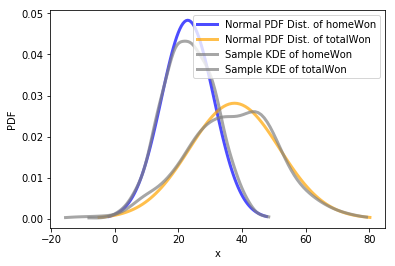

<Figure size 576x432 with 0 Axes>

In [10]:
# This part plots the Normal PDF Distribustions and the Sample KDEs of the homeWon & totalWon
thinkplot.Pdf(homeWon_pdf, label='Normal PDF Dist. of homeWon',color='Blue')
thinkplot.Pdf(totalWon_pdf, label='Normal PDF Dist. of totalWon',color='Orange')

HW_sample = np.random.normal(homeWon.mean(), homeWon.std(), 1000)
TW_sample = np.random.normal(totalWon.mean(), totalWon.std(), 1000)

HW_sample_pdf = thinkstats2.EstimatedPdf(HW_sample)
TW_sample_pdf = thinkstats2.EstimatedPdf(TW_sample)

thinkplot.Pdf(HW_sample_pdf, label='Sample KDE of homeWon',color='Gray')
thinkplot.Pdf(TW_sample_pdf, label='Sample KDE of totalWon',color='Gray')

thinkplot.Show(xlabel='x', ylabel='PDF')

- SECTION 5

Correlation between homeWon and totalWon variables are observed and visualized.

In [11]:
# Covariance of homeWon & totalWon
def Covariance(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    covariance = np.dot(xs-meanx, ys-meany) / len(xs)
    return covariance

print('Covariance of homeWon & totalWon: ')
Covariance(homeWon, totalWon)

Covariance of homeWon & totalWon: 


108.78087774891698

In [12]:
# Correlation between homeWon & totalWon
def Correlation(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    correlation = Covariance(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return correlation
print('Correlation of homeWon & totalWon: ')
Correlation(homeWon, totalWon)

Correlation of homeWon & totalWon: 


0.9299890901067381

In [13]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Correlation(xranks, yranks)
print('Spearman Correlation of homeWon & totalWon: ')
SpearmanCorr(homeWon, totalWon)

Spearman Correlation of homeWon & totalWon: 


0.9186102137109688

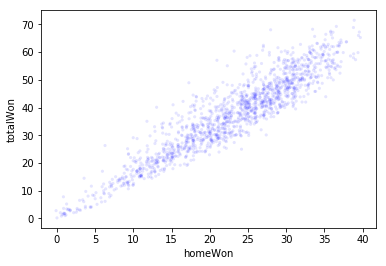

In [14]:
# Scatterplot with some noise 
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

heights = Jitter(homeWon, 0.3)
weights = Jitter(totalWon, 0.3)

thinkplot.Scatter(heights, weights, alpha=0.1, s=10)
thinkplot.Config(xlabel='homeWon',
                 ylabel='totalWon',                 
                 legend=False)

- SECTION 6

Hypothesis testing

0.0


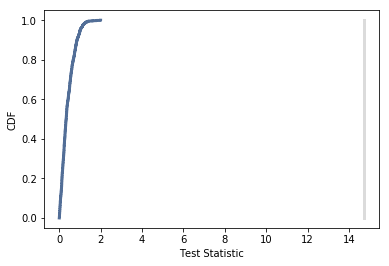

<Figure size 576x432 with 0 Axes>

In [15]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
total_data = homeWon.values, totalWon.values
ws = DiffMeansPermute(total_data)
pvalue = ws.PValue()
print (pvalue)
ws.PlotCdf()
thinkplot.Show(xlabel='Test Statistic', ylabel='CDF')